In [323]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [745]:
directory = "data/census_data/2013-2016"

df = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print
    if filename.endswith('.csv'):
        df_temp = pd.read_csv(os.path.join(directory,filename), header = 1)
        df_temp["Year_ID"] = filename[:4] + df_temp['Id2'].map(str)
        df_temp = df_temp.set_index("Year_ID")
        df.append(df_temp)
        
        

In [746]:
census_data = pd.concat(df, sort = True)

In [747]:
drug_data = pd.read_excel('data/drug_data.xlsx', sheet_name = "Data")

drug_data["Year_ID"] = drug_data["YYYY"].map(str) + drug_data["FIPS_Combined"].map(str)
#drug_data = drug_data.set_index("Year_ID")

drug_keys = drug_data.SubstanceName.unique()

drug_data = drug_data.set_index(["Year_ID", "SubstanceName"])

In [748]:
#drug_data

In [749]:
year_keys = drug_data.index
all_IDs = year_keys.get_level_values('Year_ID')

In [750]:
IDs = census_data.index
count = 0

In [751]:
def make_data_for_corr(fentanyl, street_drugs, prescription, drug_which = 'all'):
    
    count = 0
    census_data_for_Cov["Per_Capita_Opiod"] = np.nan
    census_data["Per_Capita_Opiod"] = np.nan
    census_data["Opiod_all_usage"] = np.nan
    census_data_for_Cov["Opiod_all_usage"] = np.nan
    census_data_for_Cov["Per_Capita_Drug"] = np.nan
    census_data_for_Cov["Drug_all_usage"] = np.nan

    for ids in IDs:
        try:
            #this is for opiod specifically
            df_temp = drug_data.xs(ids, level='Year_ID')
            pop = int(census_data_for_Cov.loc[[ids], ['Estimate; RELATIONSHIP - Population in households']].values)
            if drug_which == 'fentanyl':
                
                temp = (df_temp[df_temp.index.isin(fentanyl)]['DrugReports'].sum())
            elif drug_which == 'street_drugs':
                temp = (df_temp[df_temp.index.isin(street_drugs)]['DrugReports'].sum())
                
            elif drug_which == 'prescription':
                temp = (df_temp[df_temp.index.isin(prescription)]['DrugReports'].sum())
            else:
                count += 1
                temp = (df_temp["DrugReports"].sum())
                census_data.loc[[ids], ["Per_Capita_Opiod"]] = temp/pop
                census_data.loc[[ids], ["Opiod_all_usage"]] = temp
            #per_cap.append([ids ,(df_temp["DrugReports"].sum())/pop]
            census_data_for_Cov.loc[[ids], ["Per_Capita_Opiod"]] = temp/pop
            census_data_for_Cov.loc[[ids], ["Opiod_all_usage"]] = temp

            #drug in general
            df_temp = drug_data.xs(ids, level='Year_ID')
            pop = int(census_data_for_Cov.loc[[ids], ['Estimate; RELATIONSHIP - Population in households']].values)
            temp = (df_temp["TotalDrugReportsCounty"].sum())
            
            #per_cap.append([ids ,(df_temp["TotalDrugReportsCounty"].sum())/pop])
            census_data_for_Cov.loc[[ids], ["Per_Capita_Drug"]] = temp/pop
            census_data_for_Cov.loc[[ids], ["Drug_all_usage"]] = temp
        except KeyError:
            count +=1
            census_data_for_Cov.drop([ids], inplace = True)
            #print('{} not found in census_data'.format(ids))

            #should divide sum of all opiod DrugReports
            #by the estimated population of the county (population in households) i.e. a per capita DrugReport per Year
    
    #breaks the data into purely estimates
    estimates = [c for c in census_data_for_Cov.columns if c[:9] == "Estimate;" or c == "Opiod_all_usage" or c == "Drug_all_usage"]
    census_data_for_Cov_estimates = census_data_for_Cov[estimates]
    census_data_for_Cov_estimates = census_data_for_Cov_estimates.replace("(X)",np.nan)
    #census_data_for_Cov_estimates = census_data_for_Cov_estimates.fillna(0)
    
    #breaks into percent i.e. per capita
    percent = [c for c in census_data_for_Cov.columns if c[:8] == "Percent;" or c == "Per_Capita_Opiod" or c == "Per_Capita_Drug"]
    census_data_for_Cov_percent = census_data_for_Cov[percent]
    census_data_for_Cov_percent = census_data_for_Cov_percent.replace("(X)",np.nan)
    
    
    

In [752]:
def make_corr():
    Cov_matrix_est = census_data_for_Cov_estimates.cov()
    Corr_matrix_est = census_data_for_Cov_estimates.corr()

    Cov_matrix_per = census_data_for_Cov_percent.cov()
    Corr_matrix_per = census_data_for_Cov_percent.corr()


    Corr_Opiod_est = pd.DataFrame(Corr_matrix_est["Opiod_all_usage"])
    Cov_Opiod_est = pd.DataFrame(Cov_matrix_est["Opiod_all_usage"])

    Corr_Opiod_per = pd.DataFrame(Corr_matrix_per["Per_Capita_Opiod"])
    Cov_Opiod_per = pd.DataFrame(Cov_matrix_per["Per_Capita_Opiod"])

    Corr_Opiod_est = Corr_Opiod_est.reindex(Corr_Opiod_est.sort_values(by = ["Opiod_all_usage"],  ascending=False).index)

    Corr_Opiod_per = Corr_Opiod_per.reindex(Corr_Opiod_per.sort_values(by = ["Per_Capita_Opiod"],  ascending=False).index)
    
    
    
    return Corr_Opiod_per, Corr_Opiod_est



In [753]:
census_data_for_Cov = census_data.copy()

make_data_for_corr(fentanyl, street_drugs, prescription, drug_which = 'all')

Corr_Opiod_per, Corr_Opiod_est = make_corr()





Onto Covariance

In [754]:
Corr_Opiod_per

,Per_Capita_Opiod
Per_Capita_Opiod,1.000000
Per_Capita_Drug,0.766671
Percent; GRANDPARENTS - Number of grandparents living with own grandchildren under 18 years - Responsible for grandchildren,0.259388
Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 18 to 64 years - With a disability,0.245105
Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 65 years and over - With a disability,0.241057
Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Population - With a disability,0.222565
Percent; MARITAL STATUS - Females 15 years and over - Divorced,0.222409
Percent; RESIDENCE 1 YEAR AGO - Population 1 year and over - Different house in the U.S. - Same county,0.212184
"Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family",0.203587
Percent; MARITAL STATUS - Males 15 years and over - Divorced,0.182492


# Moving to type of Drugs

In [755]:
substance_keys = drug_data.index.get_level_values("SubstanceName")

In [756]:
all_ = substance_keys.unique()

In [757]:
street_drugs = ['Opium', 'Opiates', 'Heroin', 'Acetylcodeine']
fentanyl = ['Fentanyl', 'Acetyl fentanyl', 'Butyryl fentanyl',
       'Furanyl fentanyl', 'p-Fluorobutyryl fentanyl', 'cis-3-methylfentanyl',
       'Valeryl fentanyl', 'Carfentanil', 'Acryl fentanyl', 'U-47700',
       '3-Methylfentanyl', '4-Fluoroisobutyryl fentanyl',
       'trans-3-Methylfentanyl', 'p-methoxybutyryl fentanyl',
       'Tetrahydrofuran fentanyl', 'p-Fluorofentanyl', 'o-Fluorofentanyl',
       '3-Fluorofentanyl', 'Fluorofentanyl', 'Fluoroisobutyryl fentanyl',
       'Fluorobutyryl fentanyl ', 'Furanyl/3-Furanyl fentanyl',
       'Cyclopropyl fentanyl', 'Methoxyacetyl fentanyl', 'Phenyl fentanyl',
       'Benzylfentanyl', 'U-48800', 'U-49900', 'Crotonyl fentanyl',
       '3,4-Methylenedioxy U-47700', 'U-51754',
       'Cyclopropyl/Crotonyl Fentanyl', 'Isobutyryl fentanyl',
       'Cyclopentyl fentanyl', '4-Methylfentanyl']
prescription = []
for drug in all_:
    if drug not in street_drugs and drug not in fentanyl:  
        prescription.append(drug)
        

# Growth

In [758]:
drug_data

YYYY State           COUNTY  FIPS_State  \
Year_ID   SubstanceName                                                 
201051001 Propoxyphene        2010    VA         ACCOMACK          51   
201039001 Morphine            2010    OH            ADAMS          39   
201042001 Methadone           2010    PA            ADAMS          42   
201051510 Heroin              2010    VA  ALEXANDRIA CITY          51   
201042003 Hydromorphone       2010    PA        ALLEGHENY          42   
201021003 Oxycodone           2010    KY            ALLEN          21   
          Oxymorphone         2010    KY            ALLEN          21   
201051007 Heroin              2010    VA           AMELIA          51   
201051013 Heroin              2010    VA        ARLINGTON          51   
201042005 Dextropropoxyphene  2010    PA        ARMSTRONG          42   
201039005 Oxycodone           2010    OH          ASHLAND          39   
          Oxymorphone         2010    OH          ASHLAND          39   
201039007 Buprenorphine       2010    OH        ASHTABULA          39   
          Hydrocodone         2010    OH        ASHTABULA          39   
201039009 Heroin              2010    OH           ATHENS          39   
          Propoxyphene        2010    OH           ATHENS          39   
201039011 Heroin              2010    OH         AUGLAIZE          39   
          Methadone           2010    OH         AUGLAIZE          39   
          Propoxyphene        2010    OH         AUGLAIZE          39   
201054001 Oxycodone           2010    WV          BARBOUR          54   
201021009 Morphine            2010    KY           BARREN          21   
201021011 Buprenorphine       2010    KY             BATH          21   
          Hydrocodone         2010    KY             BATH          21   
201042009 Hydrocodone         2010    PA          BEDFORD          42   
201051019 Meperidine          2010    VA          BEDFORD          51   
201021013 Oxycodone           2010    KY             BELL          21   
          Oxymorphone         2010    KY             BELL          21   
201054003 Hydrocodone         2010    WV         BERKELEY          54   
201042011 Morphine            2010    PA            BERKS          42   
201051021 Propoxyphene        2010    VA            BLAND          51   
...                            ...   ...              ...         ...   
201739167 Carfentanil         2017    OH       WASHINGTON          39   
201742125 Acetyl fentanyl     2017    PA       WASHINGTON          42   
          Furanyl fentanyl    2017    PA       WASHINGTON          42   
201751191 Tramadol            2017    VA       WASHINGTON          51   
201739169 Acryl fentanyl      2017    OH            WAYNE          39   
          U-47700             2017    OH            WAYNE          39   
201742127 Methadone           2017    PA            WAYNE          42   
201751820 Fentanyl            2017    VA  WAYNESBORO CITY          51   
201754101 Oxycodone           2017    WV          WEBSTER          54   
201742129 Acryl fentanyl      2017    PA     WESTMORELAND          42   
201751193 Buprenorphine       2017    VA     WESTMORELAND          51   
          Morphine            2017    VA     WESTMORELAND          51   
201721235 Buprenorphine       2017    KY          WHITLEY          21   
201751840 Fentanyl            2017    VA  WINCHESTER CITY          51   
          Hydromorphone       2017    VA  WINCHESTER CITY          51   
201751195 Oxycodone           2017    VA             WISE          51   
          Oxymorphone         2017    VA             WISE          51   
201739173 Tramadol            2017    OH             WOOD          39   
201754107 Acetyl fentanyl     2017    WV             WOOD          54   
          Buprenorphine       2017    WV             WOOD          54   
          Tramadol            2017    WV             WOOD          54   
201721239 Morphine            2017    KY         WOODFORD          21   
201739175 Fenta

In [759]:
census_data["Year"] = np.nan
for inds in list(census_data.index.values):
    census_data.loc[[inds],["Year"]] = int(inds[:4])

In [760]:
to_be = []
years = ['2013', '2014', '2015', '2016']
for year in years:
    to_be.append(census_data.loc[census_data["Year"] == int(year)]["Opiod_all_usage"].mean())

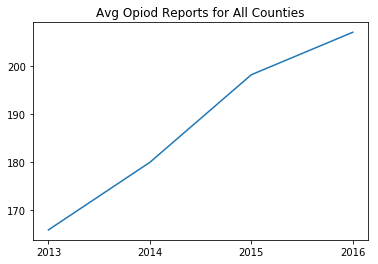

In [761]:
plt.plot(years, to_be)
plt.title("Avg Opiod Reports for All Counties")
plt.show()

In [707]:
from sklearn.linear_model import LinearRegression

def regress(dat):
    x = np.array([[0.0], [1.0], [2.0], [3.0]])
    y = dat
    reg = LinearRegression().fit(x, y)
    return reg.predict(np.array([[4]])), reg.predict(np.array([[5]])), reg.predict(np.array([[6]]))

In [728]:
census_data['Estimate; ANCESTRY - Total population'].values

array([18852, 20355, 21761, ...,  5796, 86779, 23479])

In [772]:
census_data = census_data.replace(to_replace ='(X)', value = np.nan)
census_data = census_data.dropna(thresh=0.15*(len(census_data)), axis=1)
census_data = census_data.fillna(0)


In [773]:
IDs = list(census_data.index.values)
census_data["ID"] = np.nan
for inds in list(census_data.index.values):
    census_data.loc[[inds],["ID"]] = inds[4:]

indecies = []

for id_ in list(census_data["ID"].unique()):
    indecies.append('2017' + id_)
    indecies.append('2018' + id_)
    indecies.append('2019' + id_)

census_data_predict = pd.DataFrame(index = indecies, columns=census_data.columns)



In [774]:
#bigggg boy
for id_ in list(census_data["ID"].unique()):
    for column in list(census_data.columns.values):
        data = census_data[census_data["ID"] == id_].sort_values(by = "Year")
        twenty_seven, twenty_eight, twenty_nine = regress(data[column].values)
        census_data_predict.loc[['2017'+id_], [column]] = twenty_seven.item(0)
        census_data_predict.loc[['2018'+id_], [column]] = twenty_eight.item(0)
        census_data_predict.loc[['2019'+id_], [column]] = twenty_nine.item(0)

KeyboardInterrupt: 

In [ ]:
census_data_predict = pd.DataFrame(columns=census_data.columns)
census_data_predict